# Word Frequencies

One limitation of van Paridon and Thompson (2019) 

In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import numpy as np
import os
import pandas as pd

basedir = os.path.join('Y:\\', 'Dissertation')
evaldir = 'count_evals'
evalpath = os.path.join(basedir, evaldir)

dimensions = ["500", "300", "200", "100", "50"]
windows = ["1", "2", "3","4", "5", "6"]

In [2]:
files = glob.glob(evalpath + "\\*_count_eval.csv")
sg_rows = list()
cbow_rows = list()

for file in files:
    df = pd.read_csv(file, header=0)
    df.sort_values(by='adjusted r-squared', ascending=False, inplace=True)
        
    best_cbow = None
    best_sg = None
    # Get the best sg row and the best cbow row
    for i in range(len(df)):
        source = df.iloc[i]['source']
        parts = source.split('_')
        lang = parts[0]
        dim = parts[1]
        win = parts[2]
        alg = parts[3]
        row = df.loc[i, :].values.flatten().tolist()[1:6]
        row.append(dim)
        row.append(win)
        row.append(alg)
        row = [lang] + row

        if alg == 'cbow' and best_cbow == None:
            best_cbow = row
            cbow_rows.append(row)
        elif alg == 'sg' and best_sg == None:
            best_sg = row
            sg_rows.append(row)

        if best_sg != None and best_cbow != None: break


In [3]:
# Grind up the values for cbow
counts = np.zeros((len(dimensions), len(windows)), dtype=np.int8)
labels = list()
for i in range(len(dimensions)):
    row = list()
    for j in range(len(windows)):
        row.append("")
    labels.append(row)

for i in range(len(cbow_rows)):
    r = dimensions.index(cbow_rows[i][6])
    c = windows.index(cbow_rows[i][7])
    counts[r][c] += 1
    labels[r][c] = f'{labels[r][c]}{cbow_rows[i][0]} '
    
for i in range(len(labels)):
    for j in range(len(labels[i])):
        # Put returns in place of every third space.
        label = labels[i][j].strip()
        c = 0;
        for k in range(len(label)):
            if label[k] == ' ':
                c += 1
                if c == 3:
                    label = label[:k] + '\n' + label[k + 1:]
                    c = 0
        labels[i][j] = label

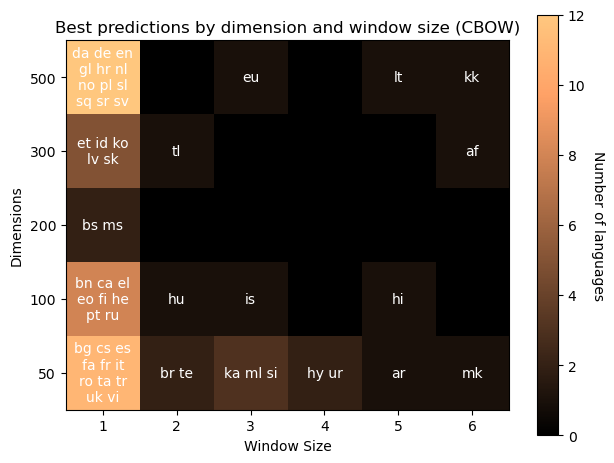

In [4]:
# Make the heatmap

fig, ax = plt.subplots()
im = ax.imshow(counts, cmap="copper")

# Create colorbar
cbar_kw = {}
cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
cbar.ax.set_ylabel("Number of languages", rotation=-90, va="bottom")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(windows)), labels=windows)
ax.set_yticks(np.arange(len(dimensions)), labels=dimensions)


# Loop over data dimensions and create text annotations.
for i in range(len(dimensions)):
    for j in range(len(windows)):
        text = ax.text(j, i, labels[i][j],
                       ha="center", va="center", color="w")

ax.set_title("Best predictions by dimension and window size (CBOW)")
ax.set_ylabel("Dimensions", rotation=90, va="bottom")
ax.set_xlabel("Window Size")
fig.tight_layout()
plt.show()


In [5]:
# Grind up the values for sg
counts = np.zeros((len(dimensions), len(windows)), dtype=np.int8)
labels = list()
for i in range(len(dimensions)):
    row = list()
    for j in range(len(windows)):
        row.append("")
    labels.append(row)

for i in range(len(sg_rows)):
    r = dimensions.index(sg_rows[i][6])
    c = windows.index(sg_rows[i][7])
    counts[r][c] += 1
    labels[r][c] = f'{labels[r][c]}{sg_rows[i][0]} '
    
for i in range(len(labels)):
    for j in range(len(labels[i])):
        # Put returns in place of every third space.
        label = labels[i][j].strip()
        c = 0;
        for k in range(len(label)):
            if label[k] == ' ':
                c += 1
                if c == 3:
                    label = label[:k] + '\n' + label[k + 1:]
                    c = 0
        labels[i][j] = label


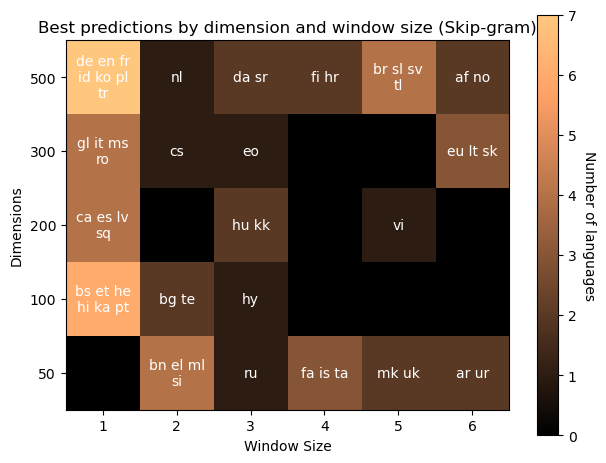

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(counts, cmap="copper")

# Create colorbar
cbar_kw = {}
cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
cbar.ax.set_ylabel("Number of languages", rotation=-90, va="bottom")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(windows)), labels=windows)
ax.set_yticks(np.arange(len(dimensions)), labels=dimensions)


# Loop over data dimensions and create text annotations.
for i in range(len(dimensions)):
    for j in range(len(windows)):
        text = ax.text(j, i, labels[i][j],
                       ha="center", va="center", color="w")

ax.set_title("Best predictions by dimension and window size (Skip-gram)")
ax.set_ylabel("Dimensions", rotation=90, va="bottom")
ax.set_xlabel("Window Size")
fig.tight_layout()
plt.show()


In [7]:
files = glob.glob(evalpath + "\\*_count_eval.csv")
wiki_retval = list()
subs_retval = list()

cols = ['Language','Dimensions','Window','Algorithm','Score']

for file in files:
    wiki_rows = list()
    subs_rows = list()
    #print("Loading scores " + file)
    df = pd.read_csv(file, header=0)

    for i in range(len(df)):
        row = list()
        score = df.iloc[i]['adjusted r-squared']
        source = df.iloc[i]['source']
        parts = source.split('_')
        lang = parts[0]
        dim = parts[1]
        win = parts[2]
        alg = parts[3]
        row.append(lang)
        row.append(dim)
        row.append(win)
        row.append(alg)
        row.append(score)
        
        dataset = df.iloc[i]['dataset']
        if 'wiki' in dataset:  wiki_rows.append(row)
        else: subs_rows.append(row)

    # Get wiki stuff
    wiki_scores = pd.DataFrame(wiki_rows)
    wiki_scores.columns = cols
    
    # Get best cbow
    wiki_scores.sort_values(by=['Score',"Dimensions","Window"], ascending=[False, True, True], inplace=True)
    df_cbow = wiki_scores.loc[wiki_scores['Algorithm'] == 'cbow']
    count = 0;
    for index, stuff in df_cbow.iterrows():
        wiki_retval.append(stuff[['Language','Dimensions','Window','Algorithm','Score']])
        count+=1
        if count>2:break
            
    # Get best sg
    df_sg = wiki_scores.loc[wiki_scores['Algorithm'] == 'sg']
    count = 0;
    for index, stuff in df_sg.iterrows():
        wiki_retval.append(stuff[['Language','Dimensions','Window','Algorithm','Score']])
        count+=1
        if count>2:break
    

    # Get subs stuff
    subs_scores = pd.DataFrame(subs_rows)
    subs_scores.columns = cols
    
    # Get best cbow
    subs_scores.sort_values(by=['Score',"Dimensions","Window"], ascending=[False, True, True], inplace=True)
    df_cbow = subs_scores.loc[subs_scores['Algorithm'] == 'cbow']
    count = 0;
    for index, stuff in df_cbow.iterrows():
        subs_retval.append(stuff[['Language','Dimensions','Window','Algorithm','Score']])
        count+=1
        if count>2:break
            
    # Get best sg
    df_sg = subs_scores.loc[subs_scores['Algorithm'] == 'sg']
    count = 0;
    for index, stuff in df_sg.iterrows():
        subs_retval.append(stuff[['Language','Dimensions','Window','Algorithm','Score']])
        count+=1
        if count>2:break

        
wiki_dataframe = pd.DataFrame(wiki_retval)  
outfile = os.path.join(evalpath,"wiki_top_3_per_algo.csv")
wiki_dataframe.to_csv(outfile)
        
subs_dataframe = pd.DataFrame(subs_retval)   
outfile = os.path.join(evalpath,"subs_top_3_per_algo.csv")
subs_dataframe.to_csv(outfile)



## Wikipedia Top 3 Scores per Algorithm

In [8]:
with pd.option_context('display.max_rows', 330):
    display(wiki_dataframe)

,Language,Dimensions,Window,Algorithm,Score
4,af,50,3,cbow,0.002216
14,af,100,2,cbow,0.002162
6,af,50,4,cbow,0.002115
57,af,500,5,sg,0.001710
43,af,300,4,sg,0.001540
33,af,200,5,sg,0.001497
8,ar,50,5,cbow,-0.000002
10,ar,50,6,cbow,-0.000025
6,ar,50,4,cbow,-0.000025
11,ar,50,6,sg,-0.000007


## Subtitles Top 3 Scores per Algorithm

In [9]:
with pd.option_context('display.max_rows', 330):
    display(subs_dataframe)

,Language,Dimensions,Window,Algorithm,Score
46,af,300,6,cbow,0.091156
14,af,100,2,cbow,0.090525
28,af,200,3,cbow,0.090448
59,af,500,6,sg,0.068206
55,af,500,4,sg,0.062775
35,af,200,6,sg,0.061730
8,ar,50,5,cbow,0.000008
10,ar,50,6,cbow,0.000004
6,ar,50,4,cbow,0.000002
11,ar,50,6,sg,0.000004


In [10]:
# Load wiki
file = os.path.join(evalpath,"wiki_top_3_per_algo.csv")
df = pd.read_csv(file, header=0)

In [11]:
df_cbow = df.loc[df['Algorithm'] == 'cbow']

# Grind up the values for wiki cbow
counts = np.zeros((len(dimensions), len(windows)), dtype=np.int8)
labels = list()
for i in range(len(dimensions)):
    row = list()
    for j in range(len(windows)):
        row.append(set())
    labels.append(row)

for i in range(len(df_cbow)):
    r = dimensions.index(str(df_cbow.iloc[i]['Dimensions']))
    c = windows.index(str(df_cbow.iloc[i]['Window']))
    counts[r][c] += 1
    labels[r][c].add(df_cbow.iloc[i]["Language"])
    
for i in range(len(labels)):
    for j in range(len(labels[i])):
        # Put returns in place of every fifth space.
        labelset = list(labels[i][j])
        label = ""
        c = 0;
        if labelset != None:
            for k in range(len(labelset)):
                label += labelset[k]
                c += 1
                if c == 5:
                    label += '\n'
                    c = 0
                else:
                    label += ' '
        labels[i][j] = label.strip()

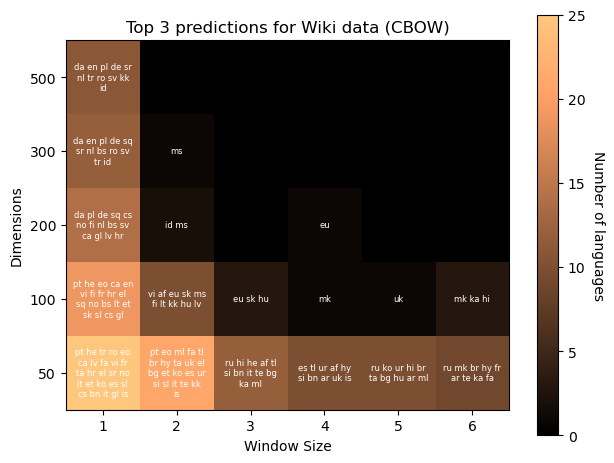

In [12]:
# Make the heatmap

fig, ax = plt.subplots()
im = ax.imshow(counts, cmap="copper")

# Create colorbar
cbar_kw = {}
cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
cbar.ax.set_ylabel("Number of languages", rotation=-90, va="bottom")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(windows)), labels=windows)
ax.set_yticks(np.arange(len(dimensions)), labels=dimensions)


# Loop over data dimensions and create text annotations.
for i in range(len(dimensions)):
    for j in range(len(windows)):
        text = ax.text(j, i, labels[i][j],
                       ha="center", va="center", color="w", size=6)

ax.set_title("Top 3 predictions for Wiki data (CBOW)")
ax.set_ylabel("Dimensions", rotation=90, va="bottom")
ax.set_xlabel("Window Size")
fig.tight_layout()
plt.show()


In [13]:
df_sg = df.loc[df['Algorithm'] == 'sg']

# Grind up the values for wiki sg
counts = np.zeros((len(dimensions), len(windows)), dtype=np.int8)
labels = list()
for i in range(len(dimensions)):
    row = list()
    for j in range(len(windows)):
        row.append(set())
    labels.append(row)

for i in range(len(df_sg)):
    r = dimensions.index(str(df_sg.iloc[i]['Dimensions']))
    c = windows.index(str(df_sg.iloc[i]['Window']))
    counts[r][c] += 1
    labels[r][c].add(df_sg.iloc[i]["Language"])
    
for i in range(len(labels)):
    for j in range(len(labels[i])):
        # Put returns in place of every fifth space.
        labelset = list(labels[i][j])
        label = ""
        c = 0;
        if labelset != None:
            for k in range(len(labelset)):
                label += labelset[k]
                c += 1
                if c == 5:
                    label += '\n'
                    c = 0
                else:
                    label += ' '
        labels[i][j] = label.strip()

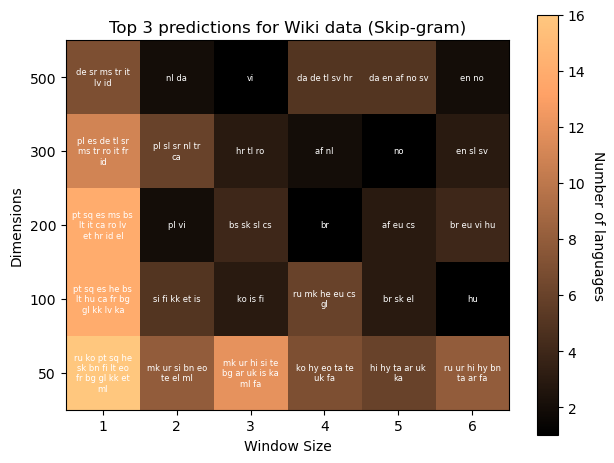

In [14]:
# Make the heatmap

fig, ax = plt.subplots()
im = ax.imshow(counts, cmap="copper")

# Create colorbar
cbar_kw = {}
cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
cbar.ax.set_ylabel("Number of languages", rotation=-90, va="bottom")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(windows)), labels=windows)
ax.set_yticks(np.arange(len(dimensions)), labels=dimensions)


# Loop over data dimensions and create text annotations.
for i in range(len(dimensions)):
    for j in range(len(windows)):
        text = ax.text(j, i, labels[i][j],
                       ha="center", va="center", color="w", size=6)

ax.set_title("Top 3 predictions for Wiki data (Skip-gram)")
ax.set_ylabel("Dimensions", rotation=90, va="bottom")
ax.set_xlabel("Window Size")
fig.tight_layout()
plt.show()

In [15]:
# Load subs
file = os.path.join(evalpath,"subs_top_3_per_algo.csv")
df = pd.read_csv(file, header=0)

In [16]:
df_cbow = df.loc[df['Algorithm'] == 'cbow']

# Grind up the values for subs cbow
counts = np.zeros((len(dimensions), len(windows)), dtype=np.int8)
labels = list()
for i in range(len(dimensions)):
    row = list()
    for j in range(len(windows)):
        row.append(set())
    labels.append(row)

for i in range(len(df_cbow)):
    r = dimensions.index(str(df_cbow.iloc[i]['Dimensions']))
    c = windows.index(str(df_cbow.iloc[i]['Window']))
    counts[r][c] += 1
    labels[r][c].add(df_cbow.iloc[i]["Language"])
    
for i in range(len(labels)):
    for j in range(len(labels[i])):
        # Put returns in place of every fifth space.
        labelset = list(labels[i][j])
        label = ""
        c = 0;
        if labelset != None:
            for k in range(len(labelset)):
                label += labelset[k]
                c += 1
                if c == 5:
                    label += '\n'
                    c = 0
                else:
                    label += ' '
        labels[i][j] = label.strip()

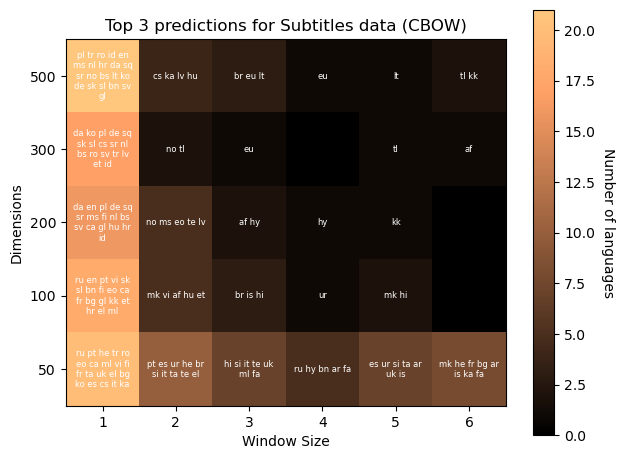

In [17]:
# Make the heatmap

fig, ax = plt.subplots()
im = ax.imshow(counts, cmap="copper")

# Create colorbar
cbar_kw = {}
cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
cbar.ax.set_ylabel("Number of languages", rotation=-90, va="bottom")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(windows)), labels=windows)
ax.set_yticks(np.arange(len(dimensions)), labels=dimensions)


# Loop over data dimensions and create text annotations.
for i in range(len(dimensions)):
    for j in range(len(windows)):
        text = ax.text(j, i, labels[i][j],
                       ha="center", va="center", color="w", size=6)

ax.set_title("Top 3 predictions for Subtitles data (CBOW)")
ax.set_ylabel("Dimensions", rotation=90, va="bottom")
ax.set_xlabel("Window Size")
fig.tight_layout()
plt.show()


In [18]:
df_sg = df.loc[df['Algorithm'] == 'sg']

# Grind up the values for wiki sg
counts = np.zeros((len(dimensions), len(windows)), dtype=np.int8)
labels = list()
for i in range(len(dimensions)):
    row = list()
    for j in range(len(windows)):
        row.append(set())
    labels.append(row)

for i in range(len(df_sg)):
    r = dimensions.index(str(df_sg.iloc[i]['Dimensions']))
    c = windows.index(str(df_sg.iloc[i]['Window']))
    counts[r][c] += 1
    labels[r][c].add(df_sg.iloc[i]["Language"])
    
for i in range(len(labels)):
    for j in range(len(labels[i])):
        # Put returns in place of every fifth space.
        labelset = list(labels[i][j])
        label = ""
        c = 0;
        if labelset != None:
            for k in range(len(labelset)):
                label += labelset[k]
                c += 1
                if c == 5:
                    label += '\n'
                    c = 0
                else:
                    label += ' '
        labels[i][j] = label.strip()

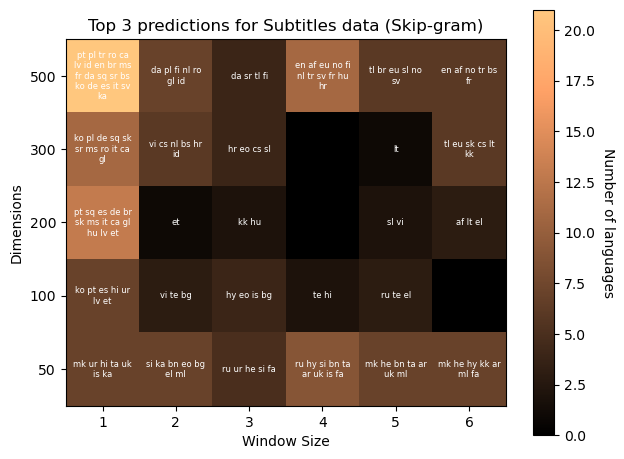

In [19]:
# Make the heatmap

fig, ax = plt.subplots()
im = ax.imshow(counts, cmap="copper")

# Create colorbar
cbar_kw = {}
cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
cbar.ax.set_ylabel("Number of languages", rotation=-90, va="bottom")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(windows)), labels=windows)
ax.set_yticks(np.arange(len(dimensions)), labels=dimensions)


# Loop over data dimensions and create text annotations.
for i in range(len(dimensions)):
    for j in range(len(windows)):
        text = ax.text(j, i, labels[i][j],
                       ha="center", va="center", color="w", size=6)

ax.set_title("Top 3 predictions for Subtitles data (Skip-gram)")
ax.set_ylabel("Dimensions", rotation=90, va="bottom")
ax.set_xlabel("Window Size")
fig.tight_layout()
plt.show()